In [1]:
'''import module'''

# basic tool
import os
from functools import reduce

# data process and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# style and text
from matplotlib.font_manager import FontProperties

# fit model and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
test = pd.read_csv("test.csv", encoding="Big5", low_memory=False)

In [3]:
test.set_index("CUS_ID", inplace=True)

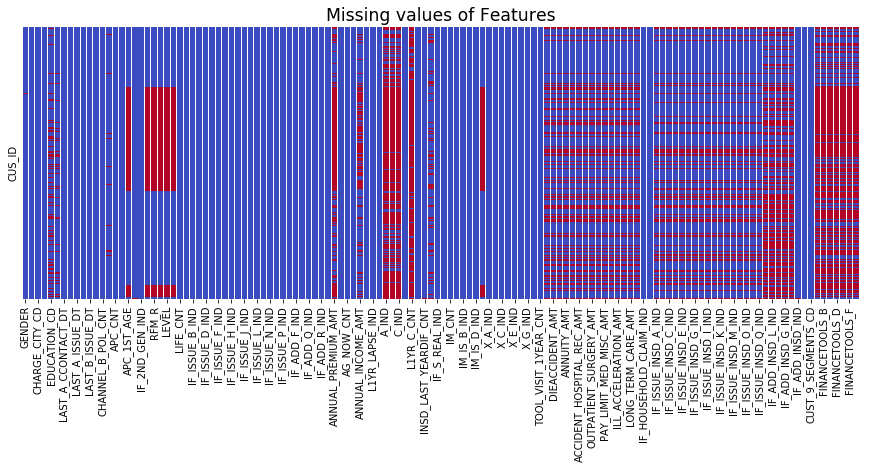

In [4]:
# Nan figure(red:Nan) of train
plt.figure(figsize=[15, 5])
plt.title("Missing values of Features", fontdict={"fontsize":"xx-large"})
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap="coolwarm")

In [4]:
test['RFM_R']=test['RFM_R'].map({'中':2,'中高':3,'低':1,'高':4})
test['REBUY_TIMES_CNT']=test['REBUY_TIMES_CNT'].map({'中':2,'中高':3,'低':1,'高':4})
test['APC_1ST_AGE']=test['APC_1ST_AGE'].map({'中':2,'中高':3,'低':1,'高':4})
test['INSD_1ST_AGE']=test['INSD_1ST_AGE'].map({'中':2,'中高':3,'低':1,'高':4})
test['AGE']=test['AGE'].map({'中':2,'中高':3,'低':1,'高':4})
test['LIFE_CNT']=test['LIFE_CNT'].map({'中':2,'低':1,'高':3})

In [5]:
test["GENDER"] = test["GENDER"].map({"F": 0, "M": 1})
test["CHARGE_CITY_CD"] = test["CHARGE_CITY_CD"].map({"A1": 1, "A2": 2, "B1":3 , "B2": 4, "C1": 5, "C2": 6, 
                                                       "D": 7, "E": 8})
test["CONTACT_CITY_CD"] = test["CONTACT_CITY_CD"].map({"A1": 1, "A2": 2, "B1":3 , "B2": 4, "C1": 5, "C2": 6, 
                                                       "D": 7, "E": 8})

test["CUST_9_SEGMENTS_CD"] = test["CUST_9_SEGMENTS_CD"].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, 
                                                               "F": 6, "G": 7, "H": 8})

In [6]:
for cols in test[["IF_2ND_GEN_IND", "LAST_A_CCONTACT_DT", "LAST_A_ISSUE_DT", 
              "LAST_B_ISSUE_DT", "IF_ISSUE_A_IND", "IF_ISSUE_B_IND", "IF_ISSUE_C_IND", 
              "IF_ISSUE_D_IND", "IF_ISSUE_E_IND", "IF_ISSUE_F_IND", "IF_ISSUE_G_IND", 
              "IF_ISSUE_H_IND", "IF_ISSUE_I_IND", "IF_ISSUE_J_IND", "IF_ISSUE_K_IND", 
              "IF_ISSUE_L_IND", "IF_ISSUE_M_IND", "IF_ISSUE_N_IND", "IF_ISSUE_O_IND", 
              "IF_ISSUE_P_IND", "IF_ISSUE_Q_IND", "IF_ADD_F_IND", "IF_ADD_L_IND", 
              "IF_ADD_Q_IND", "IF_ADD_G_IND", "IF_ADD_R_IND", "IF_ISSUE_INSD_A_IND", 
              "IF_ISSUE_INSD_B_IND", "IF_ISSUE_INSD_C_IND", "IF_ISSUE_INSD_D_IND", 
              "IF_ISSUE_INSD_E_IND", "IF_ISSUE_INSD_F_IND", "IF_ISSUE_INSD_G_IND", 
              "IF_ISSUE_INSD_H_IND", "IF_ISSUE_INSD_I_IND", "IF_ISSUE_INSD_J_IND", "IF_ISSUE_INSD_K_IND", 
              "IF_ISSUE_INSD_L_IND", "IF_ISSUE_INSD_M_IND", "IF_ISSUE_INSD_N_IND", "IF_ISSUE_INSD_O_IND", 
              "IF_ISSUE_INSD_P_IND", "IF_ISSUE_INSD_Q_IND", "IF_ADD_INSD_F_IND", "IF_ADD_INSD_L_IND", 
              "IF_ADD_INSD_Q_IND", "IF_ADD_INSD_G_IND", "IF_ADD_INSD_R_IND","IF_ADD_IND", 
              "L1YR_PAYMENT_REMINDER_IND", "L1YR_LAPSE_IND", "LAST_B_CONTACT_DT", 
              "A_IND", "B_IND", "C_IND", "LAST_C_DT", "IF_S_REAL_IND", "IF_Y_REAL_IND", "IM_IS_A_IND", 
              "IM_IS_B_IND", "IM_IS_C_IND", "IM_IS_D_IND", "X_A_IND", "X_B_IND", "X_C_IND", "X_D_IND", 
              "X_E_IND", "X_F_IND", "X_G_IND", "X_H_IND", "IF_HOUSEHOLD_CLAIM_IND", "IF_ADD_INSD_IND", 
              "FINANCETOOLS_A", "FINANCETOOLS_B", "FINANCETOOLS_C", "FINANCETOOLS_D", "FINANCETOOLS_E", 
              "FINANCETOOLS_F", "FINANCETOOLS_G"]]:
    
    test[cols] = test[cols].map({"N": 0, "Y": 1})

In [7]:
def impute(important_cols, impute_col, algorithm=ExtraTreesClassifier(random_state=111)):
    null_data = test[pd.isnull(test[impute_col])]
    value_data = test[impute_col].dropna(axis=0)
    
    imp = algorithm
    imp.fit(test[important_cols].loc[value_data.index], value_data)
    null_data[impute_col] = imp.predict(test[important_cols].loc[null_data.index])
    test["tempor"] = null_data[impute_col]
    test[impute_col] = test[[impute_col, "tempor"]].apply(impute_function, axis=1)
    test.drop("tempor", axis=1, inplace=True)
    
    return imp

def impute_function(cols):
    
    target = cols[0]
    predictor = cols[1]
    
    if pd.isnull(predictor):
        return target
    
    else:
        return predictor

In [8]:
# use OCCUPATION_CLASS_CD to fill gender
def gender_clean(cols):
    
    gender = cols[0]
    occ = cols[1]
    
    
    # if gender is null
    if pd.isnull(gender):
        
        # if occupation is 1
        if occ == 1:
            return 0
            
        else:
            return 1
        
    else:
        return gender

In [9]:
test["GENDER"] = test[["GENDER", "OCCUPATION_CLASS_CD"]].apply(gender_clean, axis=1)

In [10]:
# use LAST_C_DT to fill some  L1YR_C_CNT
def clean_l1yr_c_cnt(cols):
    
    LAST_C_DT = cols[0]
    L1YR_C_CNT = cols[1]
    
    if pd.isnull(L1YR_C_CNT):
        if LAST_C_DT == 0:
            return 0
        
    
    return L1YR_C_CNT

test["L1YR_C_CNT"] = test[["LAST_C_DT", "L1YR_C_CNT"]].apply(clean_l1yr_c_cnt, axis=1)

In [11]:
# 刪除一些欄位
test.drop(['ANNUAL_PREMIUM_AMT', 'A_IND', 'B_IND', 'C_IND',
       'IF_ADD_INSD_F_IND', 'IF_ADD_INSD_L_IND', 'IF_ADD_INSD_Q_IND',
       'IF_ADD_INSD_G_IND', 'IF_ADD_INSD_R_IND', 'FINANCETOOLS_A',
       'FINANCETOOLS_B', 'FINANCETOOLS_C', 'FINANCETOOLS_D', 'FINANCETOOLS_E',
       'FINANCETOOLS_F', 'FINANCETOOLS_G'], axis=1, inplace=True)

In [12]:
# 眾數(已確認)
test["MARRIAGE_CD"] = test["MARRIAGE_CD"].fillna(0)

In [13]:
# 設成一類
test["EDUCATION_CD"] = test["EDUCATION_CD"].fillna(0, axis=0)

In [14]:
# 重要欄位補值
important_cols =['CONTACT_CITY_CD', 'TOOL_VISIT_1YEAR_CNT', 'LIFE_INSD_CNT',
     'CUST_9_SEGMENTS_CD', 'AGE', 'L1YR_GROSS_PRE_AMT', 'CHARGE_CITY_CD',
     'CHANNEL_A_POL_CNT', 'AG_CNT', 'AG_NOW_CNT']
occ_model = impute(important_cols, "OCCUPATION_CLASS_CD")

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [15]:
# 補值
def RFM_R_impute(cols):
    
    APC_1ST_AGE = cols[0]
    RFM_R = cols[1]
    
    if pd.isnull(APC_1ST_AGE) and pd.isnull(RFM_R):
        return 0
    
    else:
        return RFM_R
test["RFM_R"] = test[["APC_1ST_AGE", "RFM_R"]].apply(RFM_R_impute, axis=1)   

In [16]:
def LEVEL_impute(cols):
    
    APC_1ST_AGE = cols[0]
    LEVEL = cols[1]
    
    if pd.isnull(LEVEL) and pd.isnull(APC_1ST_AGE):
        return 0
    
    else:
        return LEVEL
test["LEVEL"] = test[["APC_1ST_AGE", "LEVEL"]].apply(LEVEL_impute, axis=1)

In [17]:
# 設成一類
test["APC_1ST_AGE"] = test["APC_1ST_AGE"].fillna(0)
test["REBUY_TIMES_CNT"] = test["REBUY_TIMES_CNT"].fillna(0)
test["RFM_M_LEVEL"] = test["RFM_M_LEVEL"].fillna(0)

In [18]:
des1_apc_1st = test["APC_1ST_YEARDIF"].describe()
print(des1_apc_1st)

count    85786.000000
mean         0.254117
std          0.180368
min          0.000000
25%          0.113636
50%          0.204545
75%          0.409091
max          0.886364
Name: APC_1ST_YEARDIF, dtype: float64


In [19]:
def apc_1st_impute(col):

    if pd.isnull(col):
        return 0
    
    elif col <= des1_apc_1st["25%"]:
        return 1
    
    elif col > des1_apc_1st["25%"] and col <= des1_apc_1st["50%"]:
        return 2
    
    elif col > des1_apc_1st["50%"] and col <= des1_apc_1st["75%"]:
        return 3
    
    else:
        return 4
    

In [20]:
# 離散化
test["APC_1ST_YEARDIF"] = test["APC_1ST_YEARDIF"].apply(apc_1st_impute)

In [21]:
def termination_impute_fun(col):
    
    if pd.isnull(col):
        return 2
    
    elif col == 0:
        return 0
    
    else:
        return 1

In [22]:
# 離散化
test["TERMINATION_RATE"] = test["TERMINATION_RATE"].apply(termination_impute_fun)

In [23]:
important_cols = ["AGE", "CUST_9_SEGMENTS_CD", "L1YR_GROSS_PRE_AMT", "AG_CNT", "LIFE_INSD_CNT"]
impute(important_cols=important_cols, impute_col="ANNUAL_INCOME_AMT", algorithm=ExtraTreesRegressor(random_state=111)) 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=111, verbose=0, warm_start=False)

In [24]:
# 平均補值(取四捨五入至整數) => 0
round(test[test["L1YR_C_CNT"] <= 15]["L1YR_C_CNT"].mean(), 0)

0.0

In [25]:
# 補入
test["L1YR_C_CNT"].fillna(0, inplace=True)

In [26]:
def bmi_impute(col):
    
    if pd.isnull(col):
        return 0
    
    elif col < 0.2 and col >= 0:
        return 1
    
    else:
        return 0
    

In [27]:
test["BMI"] = test["BMI"].apply(bmi_impute)

In [28]:
amt_list = ["DIEBENEFIT_AMT", "DIEACCIDENT_AMT", "POLICY_VALUE_AMT", "ANNUITY_AMT", 
            "EXPIRATION_AMT", "ACCIDENT_HOSPITAL_REC_AMT", "DISEASES_HOSPITAL_REC_AMT", 
            "OUTPATIENT_SURGERY_AMT", "INPATIENT_SURGERY_AMT", "ILL_ACCELERATION_AMT", 
            "FIRST_CANCER_AMT", "ILL_ADDITIONAL_AMT", "LONG_TERM_CARE_AMT", 
            "MONTHLY_CARE_AMT", "PAY_LIMIT_MED_MISC_AMT"]

In [29]:
test["TOTAL_AMT"] = (test["DIEBENEFIT_AMT"] + test["DIEACCIDENT_AMT"] + test["ANNUITY_AMT"] + test["ACCIDENT_HOSPITAL_REC_AMT"]
                      + test["OUTPATIENT_SURGERY_AMT"] + test["MONTHLY_CARE_AMT"] + test["DISEASES_HOSPITAL_REC_AMT"] + test["FIRST_CANCER_AMT"]
                      + test["INPATIENT_SURGERY_AMT"] + test["PAY_LIMIT_MED_MISC_AMT"] + test["POLICY_VALUE_AMT"] + test["EXPIRATION_AMT"]
                      + test["ILL_ACCELERATION_AMT"] + test["ILL_ADDITIONAL_AMT"] + test["LONG_TERM_CARE_AMT"])

In [30]:
important_cols = ["AGE", "IF_Y_REAL_IND", "TOOL_VISIT_1YEAR_CNT", "IF_2ND_GEN_IND", "IF_S_REAL_IND", 
                  "IF_ADD_Q_IND", "APC_CNT", "LIFE_INSD_CNT", "CONTACT_CITY_CD"]
impute(important_cols=important_cols, impute_col="TOTAL_AMT", algorithm=ExtraTreesRegressor(random_state=111))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=111, verbose=0, warm_start=False)

In [31]:
# del original col
test.drop(amt_list, axis=1, inplace=True)

In [32]:
test_Applicant = test[test["IF_ADD_INSD_IND"].isnull()]
test_Insured = test[test["APC_1ST_AGE"] == 0]
test_mix = test.drop(pd.concat([test_Applicant, test_Insured]).index, axis=0)

In [35]:
lst = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q"]
for i in lst:
    print(i)
    
    print(test_Insured["IF_ISSUE_INSD_{}_IND".format(i)].value_counts())
    print("----------------")

A
0.0    51948
1.0      537
Name: IF_ISSUE_INSD_A_IND, dtype: int64
----------------
B
0.0    51540
1.0      945
Name: IF_ISSUE_INSD_B_IND, dtype: int64
----------------
C
0.0    49342
1.0     3143
Name: IF_ISSUE_INSD_C_IND, dtype: int64
----------------
D
0.0    45613
1.0     6872
Name: IF_ISSUE_INSD_D_IND, dtype: int64
----------------
E
0.0    52476
1.0        9
Name: IF_ISSUE_INSD_E_IND, dtype: int64
----------------
F
0.0    50302
1.0     2183
Name: IF_ISSUE_INSD_F_IND, dtype: int64
----------------
G
0.0    50920
1.0     1565
Name: IF_ISSUE_INSD_G_IND, dtype: int64
----------------
H
0.0    52485
Name: IF_ISSUE_INSD_H_IND, dtype: int64
----------------
I
0.0    46934
1.0     5551
Name: IF_ISSUE_INSD_I_IND, dtype: int64
----------------
J
0.0    40427
1.0    12058
Name: IF_ISSUE_INSD_J_IND, dtype: int64
----------------
K
0.0    52254
1.0      231
Name: IF_ISSUE_INSD_K_IND, dtype: int64
----------------
L
0.0    52093
1.0      392
Name: IF_ISSUE_INSD_L_IND, dtype: int64
----------

In [46]:
# 純被保人部分(眾數法)(已確認)
lst = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q"]

for i in lst:
    test_Insured["IF_ISSUE_INSD_{}_IND".format(i)].fillna(0, inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [48]:
# mix部分
def mix_IF_ISSUE_INSD_impute(cols):
    
    IF_ISSUE_IND = cols[0]
    IF_ISSUE_INSD_IND = cols[1]
    
    if pd.isnull(IF_ISSUE_INSD_IND):
        
        if IF_ISSUE_IND == 0:
            return 0
        
        else:
            return 1
    else:
        return IF_ISSUE_INSD_IND
        

In [49]:
for i in lst:
    test_mix["IF_ISSUE_INSD_{}_IND".format(i)] = test_mix[["IF_ISSUE_{}_IND".format(i), "IF_ISSUE_INSD_{}_IND".format(i)]].apply(mix_IF_ISSUE_INSD_impute, axis=1)

In [51]:
for i in lst:
    test["IF_ISSUE_INSD_{}_IND".format(i)] = pd.concat([test_mix, test_Insured, test_Applicant])["IF_ISSUE_INSD_{}_IND".format(i)]

In [52]:
test.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1193 to 2558094
Data columns (total 100 columns):
GENDER                       150000 non-null float64
AGE                          150000 non-null int64
CHARGE_CITY_CD               150000 non-null int64
CONTACT_CITY_CD              150000 non-null int64
EDUCATION_CD                 150000 non-null float64
MARRIAGE_CD                  150000 non-null float64
LAST_A_CCONTACT_DT           150000 non-null int64
L1YR_A_ISSUE_CNT             150000 non-null int64
LAST_A_ISSUE_DT              150000 non-null int64
L1YR_B_ISSUE_CNT             150000 non-null int64
LAST_B_ISSUE_DT              150000 non-null int64
CHANNEL_A_POL_CNT            150000 non-null int64
CHANNEL_B_POL_CNT            150000 non-null int64
OCCUPATION_CLASS_CD          150000 non-null float64
APC_CNT                      150000 non-null int64
INSD_CNT                     150000 non-null int64
APC_1ST_AGE                  150000 non-null float64
INSD_1S

In [73]:
# 剩餘用眾數填補
test["INSD_1ST_AGE"].fillna(3, inplace=True)
test["RFM_R"].fillna(1, inplace=True)
test["LEVEL"].fillna(5, inplace=True)
test["INSD_LAST_YEARDIF_CNT"].fillna(test["INSD_LAST_YEARDIF_CNT"].mean(), inplace=True)
for i in ["A", "B", "C", "D", "E", "F", "G", "H"]:
    test["X_{}_IND".format(i)].fillna(0, inplace=True)

for i in ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q"]:
    test["IF_ISSUE_INSD_{}_IND".format(i)].fillna(0, inplace=True)    

test["IF_ADD_INSD_IND"].fillna(0, inplace=True)
    

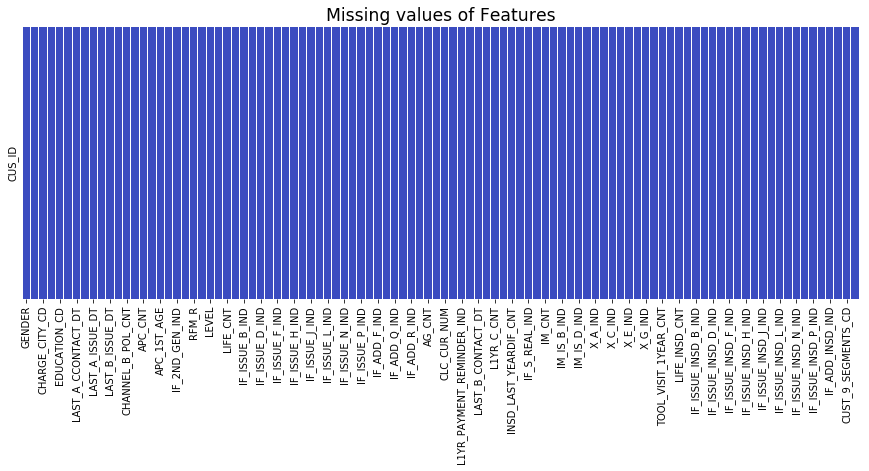

In [74]:
# Nan figure(red:Nan) of train
plt.figure(figsize=[15, 5])
plt.title("Missing values of Features", fontdict={"fontsize":"xx-large"})
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap="coolwarm")

In [76]:
# 有遺失值欄位個數
len(test.columns[pd.isnull(test).sum() != 0])

0

In [77]:
test.to_csv("test_cleaned_1.csv")

In [78]:
# check
# pd.read_csv("test_cleaned_1.csv", index_col=0)

,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,L1YR_B_ISSUE_CNT,...,IF_ISSUE_INSD_L_IND,IF_ISSUE_INSD_M_IND,IF_ISSUE_INSD_N_IND,IF_ISSUE_INSD_O_IND,IF_ISSUE_INSD_P_IND,IF_ISSUE_INSD_Q_IND,IF_ADD_INSD_IND,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,TOTAL_AMT
CUS_ID,,,,,,,,,,,,,,,,,,,,,
1193,1.0,1,1,1,2.0,0.0,1,4,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000151,3,0.008186
1727,1.0,1,1,1,0.0,0.0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,3,0.058698
3293,1.0,1,1,1,1.0,0.0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000090,3,0.000170
4328,1.0,1,1,1,0.0,0.0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,3,0.058698
5555,1.0,1,1,1,1.0,0.0,1,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000179,3,0.000498
7193,1.0,1,1,1,0.0,0.0,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.001452,1,0.275602
7337,1.0,1,1,1,0.0,0.0,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000314,3,0.000498
8142,1.0,1,1,1,0.0,0.0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,3,0.058698
8531,1.0,1,1,1,0.0,0.0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006626,1,0.459284
